#Data Modelling#

Import the required Python libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

Load final_dataset and d1 which was obtained from data cleaning

In [10]:
final_dataset=pd.read_csv('https://raw.githubusercontent.com/aana0308/Star-Type-Classification/main/data/final_dataset.csv')
final_dataset

,Unnamed: 0,Temperature,L,R,A_M,Color_Red,Color_blue-white,Color_White,Color_yellow-white,Color_Pale yellow orange,Color_Blue,Color_Orange,Color_Yellow,Color_Orange-Red,Spectral_Class_M,Spectral_Class_B,Spectral_Class_A,Spectral_Class_F,Spectral_Class_O,Spectral_Class_K,Spectral_Class_G
0,0,-0.779382,-0.598624,-0.459210,1.116745,1.069045,-0.453905,-0.229416,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,1.078036,-0.486943,-0.293211,-0.276104,-0.447214,-0.160128,-0.064685
1,1,-0.782110,-0.598624,-0.459241,1.162414,1.069045,-0.453905,-0.229416,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,1.078036,-0.486943,-0.293211,-0.276104,-0.447214,-0.160128,-0.064685
2,2,-0.828477,-0.598624,-0.459342,1.362213,1.069045,-0.453905,-0.229416,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,1.078036,-0.486943,-0.293211,-0.276104,-0.447214,-0.160128,-0.064685
3,3,-0.807496,-0.598624,-0.459229,1.167171,1.069045,-0.453905,-0.229416,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,1.078036,-0.486943,-0.293211,-0.276104,-0.447214,-0.160128,-0.064685
4,4,-0.897819,-0.598624,-0.459340,1.491607,1.069045,-0.453905,-0.229416,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,1.078036,-0.486943,-0.293211,-0.276104,-0.447214,-0.160128,-0.064685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,2.983743,1.494720,2.167974,-1.361718,-0.935414,-0.453905,-0.229416,-0.229416,-0.064685,1.812654,-0.09167,-0.112509,-0.064685,-0.927613,-0.486943,-0.293211,-0.276104,2.236068,-0.160128,-0.064685
236,236,2.133913,4.059319,1.854068,-1.428317,-0.935414,-0.453905,-0.229416,-0.229416,-0.064685,1.812654,-0.09167,-0.112509,-0.064685,-0.927613,-0.486943,-0.293211,-0.276104,2.236068,-0.160128,-0.064685
237,237,-0.175029,2.403157,2.297800,-1.437832,-0.935414,-0.453905,4.358899,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,-0.927613,-0.486943,3.410510,-0.276104,-0.447214,-0.160128,-0.064685
238,238,-0.132438,1.662878,1.695177,-1.485403,-0.935414,-0.453905,4.358899,-0.229416,-0.064685,-0.551677,-0.09167,-0.112509,-0.064685,-0.927613,-0.486943,3.410510,-0.276104,-0.447214,-0.160128,-0.064685


In [11]:
dataset=pd.read_csv('https://raw.githubusercontent.com/aana0308/Star-Type-Classification/main/data/Stars.csv')
dataset

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


Split data in final_dataset into training and testing data

In [12]:
x = final_dataset
y = dataset['Type']
x,y

(     Unnamed: 0  Temperature  ...  Spectral_Class_K  Spectral_Class_G
 0             0    -0.779382  ...         -0.160128         -0.064685
 1             1    -0.782110  ...         -0.160128         -0.064685
 2             2    -0.828477  ...         -0.160128         -0.064685
 3             3    -0.807496  ...         -0.160128         -0.064685
 4             4    -0.897819  ...         -0.160128         -0.064685
 ..          ...          ...  ...               ...               ...
 235         235     2.983743  ...         -0.160128         -0.064685
 236         236     2.133913  ...         -0.160128         -0.064685
 237         237    -0.175029  ...         -0.160128         -0.064685
 238         238    -0.132438  ...         -0.160128         -0.064685
 239         239     2.872754  ...         -0.160128         -0.064685
 
 [240 rows x 21 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 235    5
 236    5
 237    5
 238    5
 239    5
 Name: Type

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

#KNN#

Fitting KNN Classifier model to the data

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

Prediciting using model

In [15]:
pred = knn.predict(x_test)
pred

array([2, 3, 5, 1, 2, 1, 2, 3, 5, 2, 0, 2, 0, 3, 5, 4, 3, 4, 3, 0, 0, 0,
       2, 4, 4, 3, 3, 4, 5, 4, 5, 5, 5, 4, 2, 1, 0, 0, 2, 5, 1, 5, 5, 0,
       0, 2, 0, 0])

Checking accuracy of KNN model

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       0.90      1.00      0.95         9

    accuracy                           0.98        48
   macro avg       0.98      0.99      0.98        48
weighted avg       0.98      0.98      0.98        48



Finding k-value for best accuracy

Text(0, 0.5, 'Error Rate')

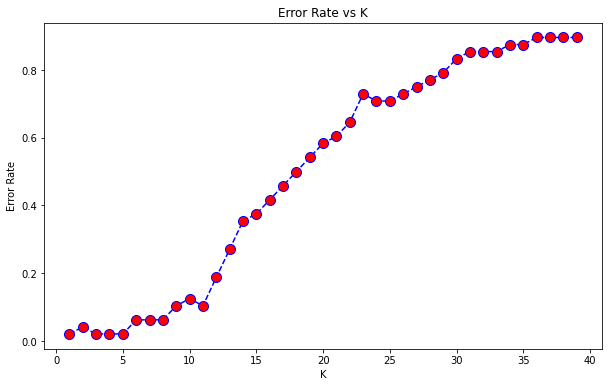

In [24]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the above graph we can conclude that the chosen k value (k = 5) is the best k value for achieving highest accuracy

In [28]:
print("Accuracy score of KNN Model with k=5 :",accuracy_score(y_test,pred)*100,"%")

Accuracy score of KNN Model with k=5 : 97.91666666666666 %


#Decision Tree#

In [33]:
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [40]:
clf_entropy = train_using_entropy(x_train, x_test, y_train)
# Prediction using entropy
y_pred_entropy = prediction(x_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Predicted values:
[2 3 5 1 2 1 2 3 5 2 0 2 0 3 5 4 3 4 3 0 0 0 2 4 4 3 3 4 5 4 0 5 5 4 2 1 0
 0 2 5 1 5 5 0 0 2 0 0]
Confusion Matrix:  [[12  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0  9]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



#Saving the models#

In [42]:
import pickle

Pkl_Filename1 = "KNN_Model.pkl"  
with open(Pkl_Filename1, 'wb') as file:  
    pickle.dump(knn, file)

Pkl_Filename2 = "Decision_Tree_Model.pkl"  
with open(Pkl_Filename2, 'wb') as file:  
    pickle.dump(clf_entropy, file)